This code is meant to build and plot a dataframe which shows the % of total population enrolled in public schools for high growth counties in NC as part of the NC Growth Project 
m.hargroder@outlook.com

In [1]:
%matplotlib notebook
%matplotlib inline

# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt


Import raw files and build datafram with public and non publc shcool enrollment for years in analysis

In [6]:
enrol_P = pd.read_csv('data_import/cnty_PubSchoolEnroll12-18.csv')

 #drop AreaType, Var Name, and rename Value colum to PS_Enrollment
enrol_P.drop(columns=['Area Type','Variable'], inplace = True)
enrol_P.rename(columns ={'Value':'PS_Enrollment', 'Area Name':'County'}, inplace = True)
  
enrol_NP = pd.read_csv('data_import/cnty_NonPubSchoolEnroll12-18.csv')    

enrol = pd.merge(enrol_P, enrol_NP , on = ['County','Year'], how = 'inner')
    
enrol.head()


,County,Year,PS_Enrollment,NPS_Enrollment
0,Wayne,2014,20318,2296
1,Brunswick,2013,13629,1435
2,Davidson,2013,25970,3140
3,Hoke,2013,8510,725
4,Camden,2012,1958,97


In [7]:
pop = pd.read_csv('data_import/cnty_Pop12-18.csv')
pop.rename(columns ={'Area Name':'County'}, inplace = True)
pop.head()


,County,Year,Population
0,Duplin,2018,59772
1,Warren,2017,20249
2,Washington,2018,12153
3,Watauga,2016,55142
4,Wayne,2017,124086


Merge county enrollment and population dataframes 

In [8]:
df1 = pd.merge(enrol, pop , on = ['County','Year'], how = 'left')
#check shape, should still be 700 rows
df1.shape
df1.head(10)

,County,Year,PS_Enrollment,NPS_Enrollment,Population
0,Wayne,2014,20318,2296,125646
1,Brunswick,2013,13629,1435,115284
2,Davidson,2013,25970,3140,163498
3,Hoke,2013,8510,725,50581
4,Camden,2012,1958,97,9966
5,Tyrrell,2013,576,38,4138
6,Bladen,2018,4933,511,34566
7,Gaston,2017,35076,5238,218445
8,Montgomery,2018,3976,548,27621
9,Martin,2018,3529,230,23264


Import and high growth county file to to create a series and list so can identify high growth counties in df1

In [4]:
high_grwth_cnty = pd.read_csv('data_import/cnty_growth.csv', usecols= [0])
high_grwth_cnty['CO_NAME'] =high_grwth_cnty['CO_NAME'].str.title()
high_grwth_cnty.rename(columns ={'CO_NAME':'County'}, inplace = True)
#high_grwth_cnty['High_Growth'] = True

high_grwth_cnty.head()

#grwth_Counties = high_grwth_cnty['County'].tolist()
#grwth_Counties 

,County
0,Brunswick
1,Pender
2,Johnston
3,Cabarrus
4,Chatham


Add column to df1 that returns boolean if county in high_grwth_cnty series

In [11]:
#df1['High_Growth'] = df1.County.apply(lambda row: row['County'] in grwth_Counties, axis = 1)
df1['High_Growth'] = df1.County.isin(high_grwth_cnty.County.values)

df1.head(10)


,County,Year,PS_Enrollment,NPS_Enrollment,Population,High_Growth
0,Wayne,2014,20318,2296,125646,False
1,Brunswick,2013,13629,1435,115284,True
2,Davidson,2013,25970,3140,163498,False
3,Hoke,2013,8510,725,50581,False
4,Camden,2012,1958,97,9966,False
5,Tyrrell,2013,576,38,4138,False
6,Bladen,2018,4933,511,34566,False
7,Gaston,2017,35076,5238,218445,False
8,Montgomery,2018,3976,548,27621,False
9,Martin,2018,3529,230,23264,False


Add columns wich represents the % of population enrolled in PS and Non PS for each row (County and Year)

In [29]:
df1['PercPop_PSEnrolled'] = round((df1['PS_Enrollment'] / df1['Population']),2)
df1['PercPop_NPSEnrolled'] = round((df1['NPS_Enrollment'] / df1['Population']),2)
df1.head(10)


,County,Year,PS_Enrollment,NPS_Enrollment,Population,High_Growth,PercPop_PSEnrolled,PercPop_NPSEnrolled
0,Wayne,2014,20318,2296,125646,False,0.16,0.02
1,Brunswick,2013,13629,1435,115284,True,0.12,0.01
2,Davidson,2013,25970,3140,163498,False,0.16,0.02
3,Hoke,2013,8510,725,50581,False,0.17,0.01
4,Camden,2012,1958,97,9966,False,0.20,0.01
5,Tyrrell,2013,576,38,4138,False,0.14,0.01
6,Bladen,2018,4933,511,34566,False,0.14,0.01
7,Gaston,2017,35076,5238,218445,False,0.16,0.02
8,Montgomery,2018,3976,548,27621,False,0.14,0.02
9,Martin,2018,3529,230,23264,False,0.15,0.01


Group on High Growth indicator and year to get mean enrollment

In [72]:
df2 = df1.groupby(['Year', 'High_Growth'])['PercPop_PSEnrolled', 'PercPop_NPSEnrolled'].mean().reset_index()
df2['PercPop_PSEnrolled'] = round(df2['PercPop_PSEnrolled']*100,1)
df2['PercPop_NPSEnrolled'] = round(df2['PercPop_NPSEnrolled']*100,1)


df2.head(8)

#df.groupby(['name', 'id', 'dept'])['total_sale'].mean().reset_index()

,Year,High_Growth,PercPop_PSEnrolled,PercPop_NPSEnrolled
0,2012,False,14.8,1.5
1,2012,True,15.8,1.8
2,2013,False,14.8,1.5
3,2013,True,15.8,1.8
4,2014,False,14.8,1.7
5,2014,True,16.0,1.9
6,2015,False,14.8,1.8
7,2015,True,15.9,2.0


Plot Data in Sub Plots

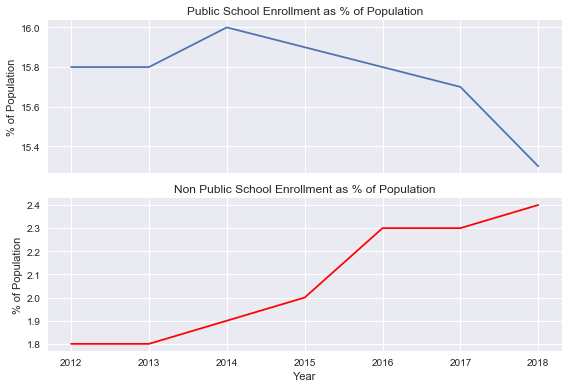

In [107]:
hgfilt = df2['High_Growth']

# create data for axes
hgyr = df2.loc[hgfilt,'Year'].to_numpy()
highGrowthPS = df2.loc[hgfilt,'PercPop_PSEnrolled'].to_numpy()

nhgyr = df2.loc[hgfilt,'Year'].to_numpy()
highGrowthNPS = df2.loc[ hgfilt,'PercPop_NPSEnrolled']


#plot data
plt.style.use('seaborn')
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True)

ax1.plot(hgyr,highGrowthPS, label = 'High Growth Public School Enrollment' )
ax1.set_title('Public School Enrollment as % of Population')
#ax1.set_xlabel('Year') #using sharex
ax1.set_ylabel('% of Population')

ax2.plot(nhgyr,highGrowthNPS, label = 'High Growth Non Public School Enrollment' , c = 'r')
#ax2.legend()
ax2.set_title('Non Public School Enrollment as % of Population')
ax2.set_xlabel('Year')
ax2.set_ylabel('% of Population')

plt.tight_layout()
plt.show()

fig.savefig('img/HighGrowthCnty_PubNonPubSchEnroll.png')